In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

In [2]:
# Leser inn CSV filer og lagrer dem i pandas dataframes
df_a = pd.read_csv('A.csv') # aldersfordeling for innbyggerne i Klepp kommune
df_b = pd.read_csv('B.csv') # personer med innvandrerbakgrunn 
df_c = pd.read_csv('C.csv') # hva innbyggerne jobber med
df_d = pd.read_csv('D.csv') # høyeste fullførte utdanningsnivå
df_e = pd.read_csv('E.csv') # hva bruker Klepp kommune kulturmidlene til
df_f = pd.read_csv('F.csv') # utgifter etter utvalgte områder
df_g = pd.read_csv('G.csv') # typer biler i Klepp kommune
df_ta = pd.read_csv('TA.csv') # aldersfordeling for innbyggerne i Tromsø kommune
df_tj = pd.read_csv('TJ.csv') # hva jobber innbyggerne med
df_tu = pd.read_csv('TU.csv') # høyeste fullførte utdanningsnivå

In [3]:
# 1
# Splitter kolonnen 'Alder;"Kvinner";"Menn"' i separate kolonner
df_a[['Alder', 'Kvinner', 'Menn']] = df_a['Alder;"Kvinner";"Menn"'].str.split(';', expand=True)

# Konverterer 'Kvinner' og 'Menn' til numeriske verdier
df_a['Kvinner'] = pd.to_numeric(df_a['Kvinner'])
df_a['Menn'] = pd.to_numeric(df_a['Menn'])

# Lager en ny kolonne for 10-årsgrupper
def lag_10aars_gruppe(alder_str):
    if "år eller eldre" in alder_str:
        return "+100"
    start = int(alder_str.split('-')[0])
    return f"{start // 10 * 10}-{start // 10 * 10 + 9}"

df_a['Aldersgruppe_10'] = df_a['Alder'].apply(lag_10aars_gruppe)

# Grupperer på den nye 10-årsgruppen og summerer 'Kvinner' og 'Menn'
df_a_group = df_a.groupby('Aldersgruppe_10').agg(
    Kvinner=('Kvinner', 'sum'),
    Menn=('Menn', 'sum')
).reset_index()

# Gir kolonnene mer passende navn og grupperer etter alder
df_a_group.rename(columns={'Aldersgruppe_10': 'Alder'}, inplace=True)

# Definerer en eksplisitt rekkefølge for aldersgruppene MED '+100' nederst
sorteringsrekkefølge = ['+100', '90-99', '80-89', '70-79', '60-69', '50-59', '40-49', '30-39', '20-29', '10-19', '0-9']
df_a_group['Alder'] = pd.Categorical(df_a_group['Alder'], categories=sorteringsrekkefølge, ordered=True)
df_a_group = df_a_group.sort_values('Alder').reset_index(drop=True)

print(df_a_group)

    Alder  Kvinner  Menn
0    +100       -1     0
1   90-99      -55    31
2   80-89     -337   301
3   70-79     -714   690
4   60-69     -884   960
5   50-59    -1357  1455
6   40-49    -1439  1514
7   30-39    -1526  1587
8   20-29    -1268  1434
9   10-19    -1455  1542
10    0-9    -1252  1384


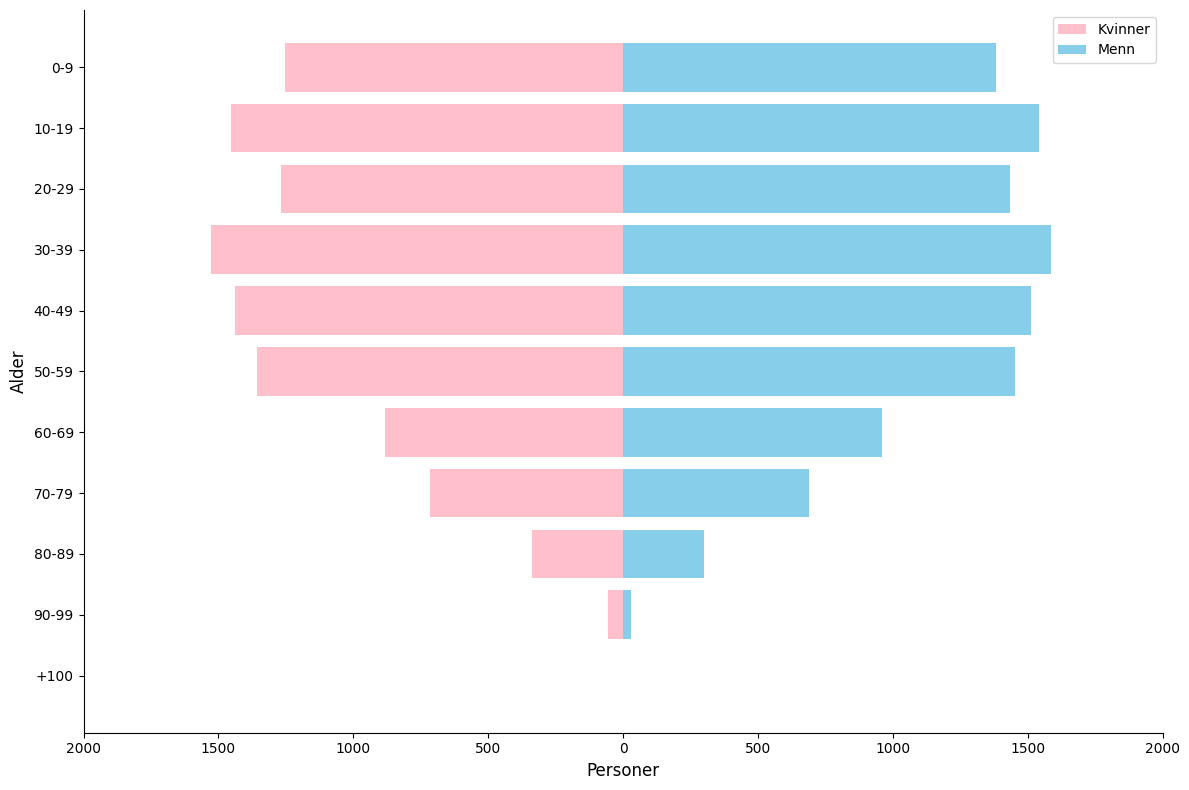

In [4]:
# Plotting
fig, ax = plt.subplots(figsize=(12, 8))

# Lager det horisontale søylediagrammet for kvinner (med negative verdier for speileffekt)
ax.barh(df_a_group['Alder'], df_a_group['Kvinner'], color='pink', label='Kvinner')

# Lager det horisontale søylediagrammet for menn
ax.barh(df_a_group['Alder'], df_a_group['Menn'], color='skyblue', label='Menn')

# Setter etikett for x-aksen
ax.set_xlabel('Personer', fontsize=12)

# Setter etikett for y-aksen
ax.set_ylabel('Alder', fontsize=12)

# Juster x-aksen til å vise absolutte verdier (basert på dataene)
max_value = max(df_a_group['Kvinner'].max(), df_a_group['Menn'].max())
ax.set_xticks(np.arange(-2000, 2500, 500))
ax.set_xticklabels([str(abs(x)) for x in ax.get_xticks()])

# Sentrerer y-aksens ticks på aldersgruppene
ax.set_yticks(df_a_group['Alder'])
ax.set_yticklabels(df_a_group['Alder'])

# Legger til en forklaring
ax.legend()

# Fjerner ryggraden til høyre og toppen for et renere utseende
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Justerer layout for å unngå overlapping
plt.tight_layout()

# Lagrer plottet til en fil (i stedet for plt.show())
plt.show()

In [5]:
# Beregner totalt antall kvinner (gjør de negative tallene positive)
total_kvinner = df_a_group['Kvinner'].abs().sum()

# Beregner totalt antall menn
total_menn = df_a_group['Menn'].sum()

# Beregner totalt antall innbyggere
total_innbyggere = total_kvinner + total_menn

print(f"Totalt antall kvinner: {int(total_kvinner)}")
print(f"Totalt antall menn: {int(total_menn)}")
print(f"Totalt antall innbyggere i Klepp ifølge datarammen: {int(total_innbyggere)}")

Totalt antall kvinner: 10288
Totalt antall menn: 10898
Totalt antall innbyggere i Klepp ifølge datarammen: 21186


C:\Users\prebe\AppData\Local\Temp\ipykernel_4068\2160517448.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(df_b_sorted['Land'], rotation=45, ha='right')


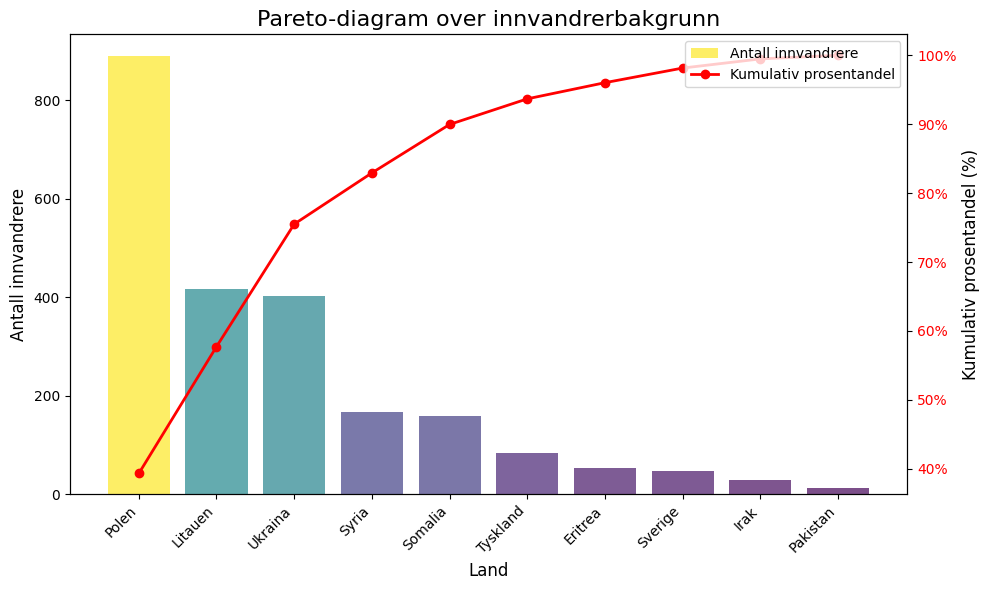

In [6]:
# 2
# Sorterer DataFrame-en etter antall innvandrere i synkende rekkefølge
df_b[['Land', '2025']] = df_b['Land;"2025"'].str.split(';', expand=True)
df_b['2025'] = pd.to_numeric(df_b['2025'])
df_b_sorted = df_b.sort_values(by='2025', ascending=False).reset_index(drop=True)

# Beregner den kumulative summen av innvandrere
df_b_sorted['Kumulativ_Sum'] = df_b_sorted['2025'].cumsum()

# Beregner den totale summen av innvandrere
total_innvandrere = df_b_sorted['2025'].sum()

# Beregner den kumulative prosentandelen
df_b_sorted['Kumulativ_Prosent'] = df_b_sorted['Kumulativ_Sum'] / total_innvandrere * 100

# Oppretter figuren og aksen
fig, ax1 = plt.subplots(figsize=(10, 6))

# Lager søylediagrammet for antall innvandrere fra hvert land
farger = plt.cm.viridis(df_b_sorted['2025'] / max(df_b_sorted['2025'])) # Lager en fargeskala basert på antall
ax1.bar(df_b_sorted['Land'], df_b_sorted['2025'], color=farger, alpha=0.7, label='Antall innvandrere')
ax1.set_xlabel('Land', fontsize=12)
ax1.set_ylabel('Antall innvandrere', fontsize=12)
ax1.tick_params(axis='y')
ax1.set_xticklabels(df_b_sorted['Land'], rotation=45, ha='right')

# Oppretter en sekundær akse for den kumulative prosentandelen
ax2 = ax1.twinx()
ax2.plot(df_b_sorted['Land'], df_b_sorted['Kumulativ_Prosent'], color='red', marker='o', linestyle='-', linewidth=2, label='Kumulativ prosentandel')
ax2.set_ylabel('Kumulativ prosentandel (%)', fontsize=12)
ax2.tick_params(axis='y', labelcolor='red')
ax2.yaxis.set_major_formatter(mtick.PercentFormatter())

# Kombinerer legendene fra begge akser
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')

# Setter tittelen på diagrammet
plt.title('Pareto-diagram over innvandrerbakgrunn', fontsize=16)

# Justerer layout for å unngå overlapping
plt.tight_layout()

# Viser diagrammet
plt.show()

Minimum antall innvandrere fra ett av de utvalgte landene: 12


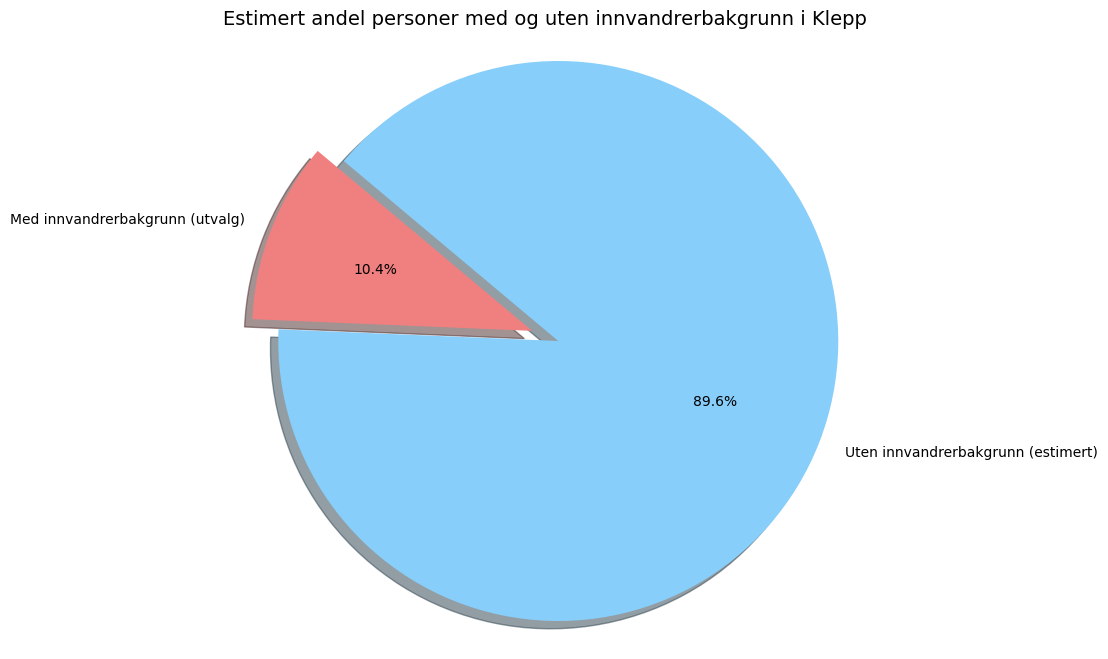


Totalt antall innbyggere i Klepp (fra df_a): 21186
Estimert antall personer med innvandrerbakgrunn (fra utvalg i df_b): 2213
Estimert antall personer uten innvandrerbakgrunn: 18973


In [7]:
# Splitter den kombinerte kolonnen i 'Land' og '2025'
df_b[['Land', '2025']] = df_b['Land;"2025"'].str.split(';', expand=True)

# Fjerner den første raden som inneholder den gamle header-informasjonen
df_b = df_b.iloc[1:].reset_index(drop=True)

# Fjerner eventuelle tallprefiks fra 'Land'-kolonnen
df_b['Land'] = df_b['Land'].str.replace(r'^\d+', '', regex=True).str.strip()

# Konverterer '2025'-kolonnen til numerisk
df_b['2025'] = pd.to_numeric(df_b['2025'])

# Finner minimum antall innvandrere
minimum_innvandrere = df_b['2025'].min()
print(f"Minimum antall innvandrere fra ett av de utvalgte landene: {minimum_innvandrere}")

# --- Kakediagram (forutsatt at vi har total befolkning og total innvandrerbakgrunn) ---
# Henter estimert totalt antall innvandrere fra df_b (summen av utvalget)
total_innvandrerbakgrunn = df_b['2025'].sum()

# Beregner antall personer uten innvandrerbakgrunn (estimert)
uten_innvandrerbakgrunn = total_innbyggere - total_innvandrerbakgrunn

# Lager data for kakediagrammet
labels = 'Med innvandrerbakgrunn (utvalg)', 'Uten innvandrerbakgrunn (estimert)'
sizes = [total_innvandrerbakgrunn, uten_innvandrerbakgrunn]
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0)  # Få den første biten litt ut

# Lager kakediagrammet
plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Estimert andel personer med og uten innvandrerbakgrunn i Klepp', fontsize=14)
plt.axis('equal')  # Sikrer at kakediagrammet tegnes som en sirkel.
plt.show()

print(f"\nTotalt antall innbyggere i Klepp (fra df_a): {int(total_innbyggere)}")
print(f"Estimert antall personer med innvandrerbakgrunn (fra utvalg i df_b): {int(total_innvandrerbakgrunn)}")
print(f"Estimert antall personer uten innvandrerbakgrunn: {int(uten_innvandrerbakgrunn)}")

In [8]:
# 3
# Arbeidsfør alder (20-65)
# Definerer aldersgrupper for arbeidsfør alder
arbeidsfor_alder_grupper = ['20-29', '30-39', '40-49', '50-59', '60-69']

# Initialiserer variabelen for å lagre total befolkning i arbeidsfør alder
befolkning_arbeidsfor_alder = 0

# Itererer gjennom hver aldersgruppe
for alder_gruppe in arbeidsfor_alder_grupper:
    # Henter antall kvinner i den aktuelle aldersgruppen og tar absoluttverdien (for å håndtere negative verdier)
    kvinner = df_a_group.loc[df_a_group['Alder'] == alder_gruppe, 'Kvinner'].abs().sum()
    # Henter antall menn i den aktuelle aldersgruppen
    menn = df_a_group.loc[df_a_group['Alder'] == alder_gruppe, 'Menn'].sum()
    # Legger til antall kvinner og menn i totalen for arbeidsfør alder
    befolkning_arbeidsfor_alder += kvinner + menn

# Skriver ut estimert antall innbyggere i arbeidsfør alder (20-65)
print(f"Estimert antall innbyggere i arbeidsfør alder (20-65): {int(befolkning_arbeidsfor_alder)}")

Estimert antall innbyggere i arbeidsfør alder (20-65): 13424


Estimert antall innbyggere i arbeidsfør alder (20-64): 12599
Totalt antall sysselsatte i de beskrevne næringene (2020): 10355


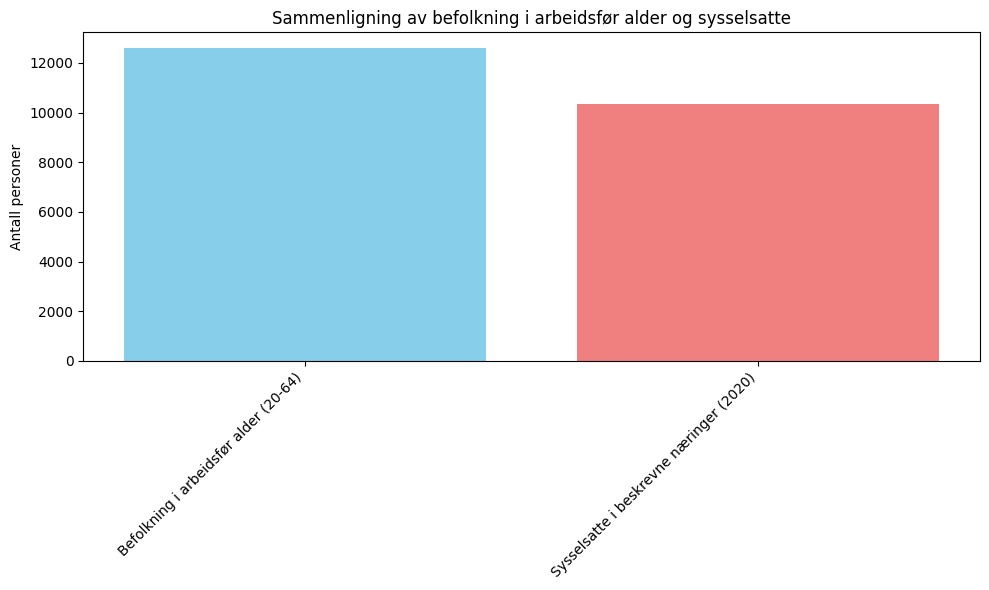


Estimert antall personer utenfor jobb i arbeidsfør alder: 2244
Estimert prosentandel personer utenfor jobb i arbeidsfør alder: 17.81%


In [9]:
# Arbeidsfør alder (20-64 år, justert i henhold til vanlig definisjon)
arbeidsfor_alder_df = df_a[df_a['Alder'].isin(['20-24 år', '25-29 år', '30-34 år', '35-39 år', '40-44 år', '45-49 år', '50-54 år', '55-59 år', '60-64 år'])]

# Beregner total befolkning i arbeidsfør alder
befolkning_arbeidsfor_alder = arbeidsfor_alder_df['Kvinner'].abs().sum() + arbeidsfor_alder_df['Menn'].sum()

print(f"Estimert antall innbyggere i arbeidsfør alder (20-64): {int(befolkning_arbeidsfor_alder)}")

# Splitter kolonnen 'Næring;"2020"' i separate kolonner
df_c[['Næring', '2020']] = df_c['Næring;"2020"'].str.split(';', expand=True)

# Konverterer '2020' til numerisk datatype
df_c['2020'] = pd.to_numeric(df_c['2020'])

# Beregner totalt antall sysselsatte
total_sysselsatte = df_c['2020'].sum()
print(f"Totalt antall sysselsatte i de beskrevne næringene (2020): {total_sysselsatte}")

# Lage stolpediagram
labels = ['Befolkning i arbeidsfør alder (20-64)', 'Sysselsatte i beskrevne næringer (2020)']
antall = [befolkning_arbeidsfor_alder, total_sysselsatte]

plt.figure(figsize=(10, 6))
plt.bar(labels, antall, color=['skyblue', 'lightcoral'])
plt.ylabel('Antall personer')
plt.title('Sammenligning av befolkning i arbeidsfør alder og sysselsatte')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Estimere prosentandel utenfor jobb
antall_utenfor_jobb = befolkning_arbeidsfor_alder - total_sysselsatte
prosent_utenfor_jobb = (antall_utenfor_jobb / befolkning_arbeidsfor_alder) * 100

print(f"\nEstimert antall personer utenfor jobb i arbeidsfør alder: {int(antall_utenfor_jobb)}")
print(f"Estimert prosentandel personer utenfor jobb i arbeidsfør alder: {prosent_utenfor_jobb:.2f}%")

# Tanker om estimatet (samme som tidligere, men med justert aldersgruppe)
- Tidsforskjell mellom befolkningsdata og sysselsettingsdata (estimat for nåtid vs. 2020)
- Ufullstendig sysselsettingsdata (kun et utvalg av næringer er inkludert)
- Arbeidsfør alder (20-64) inkluderer også studenter, uføre, hjemmeværende osv. som ikke nødvendigvis er i jobb.
- Antagelse om at befolkningsdata og sysselsettingsdata refererer til nøyaktig samme geografiske område.
- Pendling inn og ut av kommunen er ikke tatt med i betraktning.
På grunn av disse faktorene er estimatet for prosentandelen utenfor jobb svært grovt og sannsynligvis ikke en nøyaktig representasjon av den faktiske situasjonen.

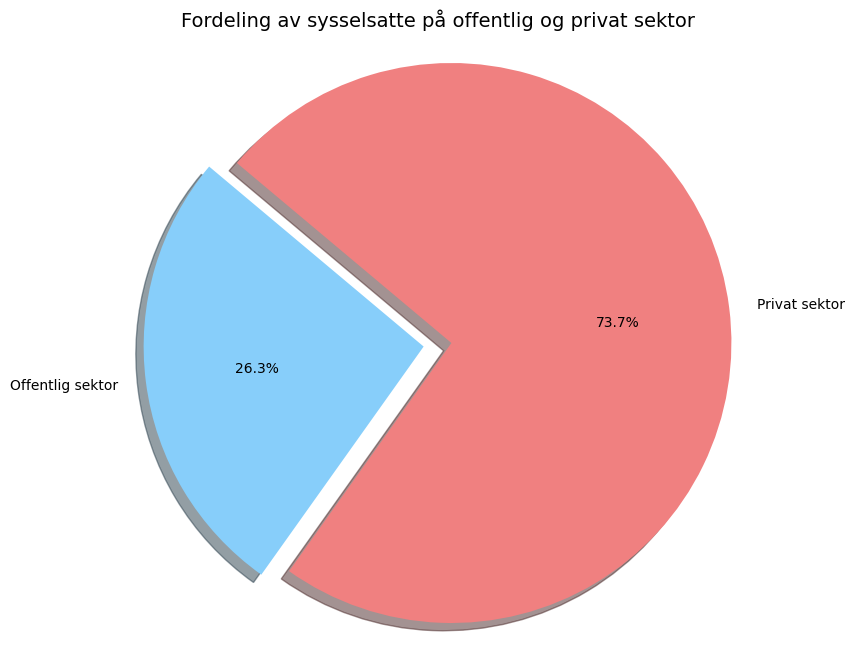

In [10]:
# Definerer en funksjon for å kategorisere næringer
def kategoriser_sektor(næring):
    offentlig_sektor = ["Off.adm., forsvar, sosialforsikring", "Undervisning", "Helse- og sosialtjenester"]
    if næring in offentlig_sektor:
        return "Offentlig sektor"
    else:
        return "Privat sektor"

# Legger til en 'Sektor'-kolonne i df_c
df_c['Sektor'] = df_c['Næring'].apply(kategoriser_sektor)

# Grupperer dataene etter sektor og summerer antall sysselsatte
df_sektor = df_c.groupby('Sektor')['2020'].sum().reset_index()

# Lager kakediagrammet
labels = df_sektor['Sektor']
sizes = df_sektor['2020']
colors = ['lightskyblue', 'lightcoral']  # Velger farger for sektorene
explode = (0.1, 0)  # Få den offentlige sektoren litt ut

plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Fordeling av sysselsatte på offentlig og privat sektor', fontsize=14)
plt.axis('equal')  # Sikrer at kakediagrammet tegnes som en sirkel.
plt.show()

# Tanker om inndelingen:
Tanker om inndelingen:
- Denne inndelingen er en forenkling av den komplekse økonomiske virkeligheten.
- 'Offentlig sektor' er relativt klar, men 'Privat sektor' er en heterogen gruppe som inkluderer alt fra jordbruk til varehandel.
- Noen næringer kan ha både offentlige og private aktører (f.eks. helse og undervisning). Vår inndeling plasserer hele næringen i en av sektorene.
- 'Varehandel, hotell og restaurant, samferdsel, ...' er en veldig bred kategori som klumper sammen svært forskjellige aktiviteter.
- Inndelingen kan være nyttig for å få et overordnet bilde av sektorenes relative størrelse, men gir lite innsikt i nyanser innenfor hver sektor.
- For en mer detaljert analyse ville en finere inndeling av næringene være nødvendig.

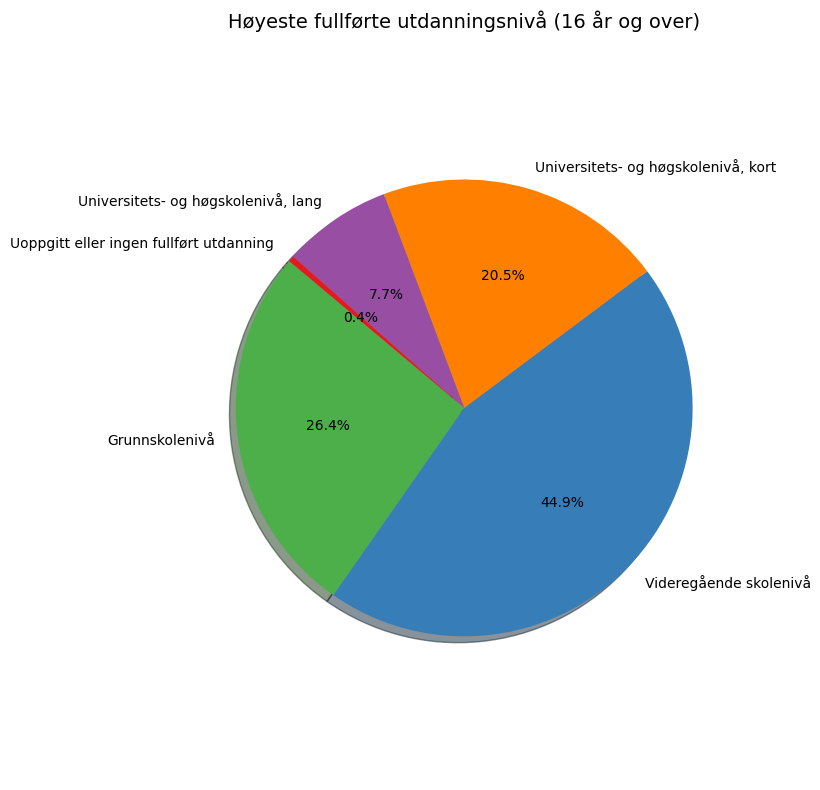

In [11]:
# 4
# Splitter kolonnen 'Utdanningsnivå;"Personer 16 år og over"' i separate kolonner
df_d[['Utdanningsnivå', 'Personer 16 år og over']] = df_d['Utdanningsnivå;"Personer 16 år og over"'].str.split(';', expand=True)

# Konverterer 'Personer 16 år og over' til numerisk datatype
df_d['Personer 16 år og over'] = pd.to_numeric(df_d['Personer 16 år og over'])

# Beregner prosentandelene for kakediagrammet
total_personer = df_d['Personer 16 år og over'].sum()
df_d['Prosentandel'] = (df_d['Personer 16 år og over'] / total_personer) * 100

# Lager kakediagrammet
labels = df_d['Utdanningsnivå']
sizes = df_d['Prosentandel']
colors = ['#4daf4a', '#377eb8', '#ff7f00', '#984ea3', '#e41a1c'] # Velger noen farger
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Høyeste fullførte utdanningsnivå (16 år og over)', fontsize=14)
plt.axis('equal')  # Sikrer at kakediagrammet tegnes som en sirkel.
plt.tight_layout()
plt.show()

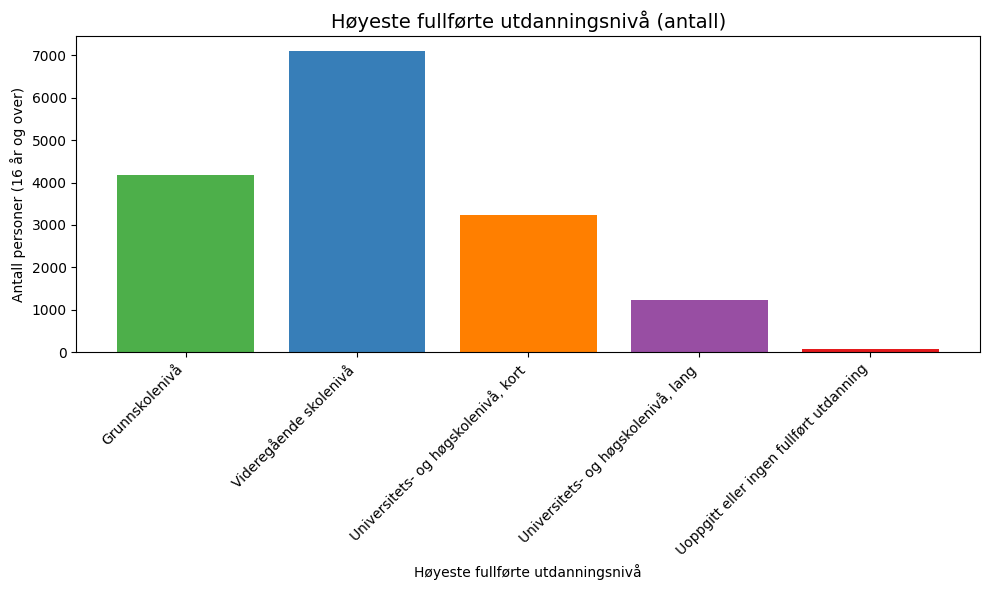

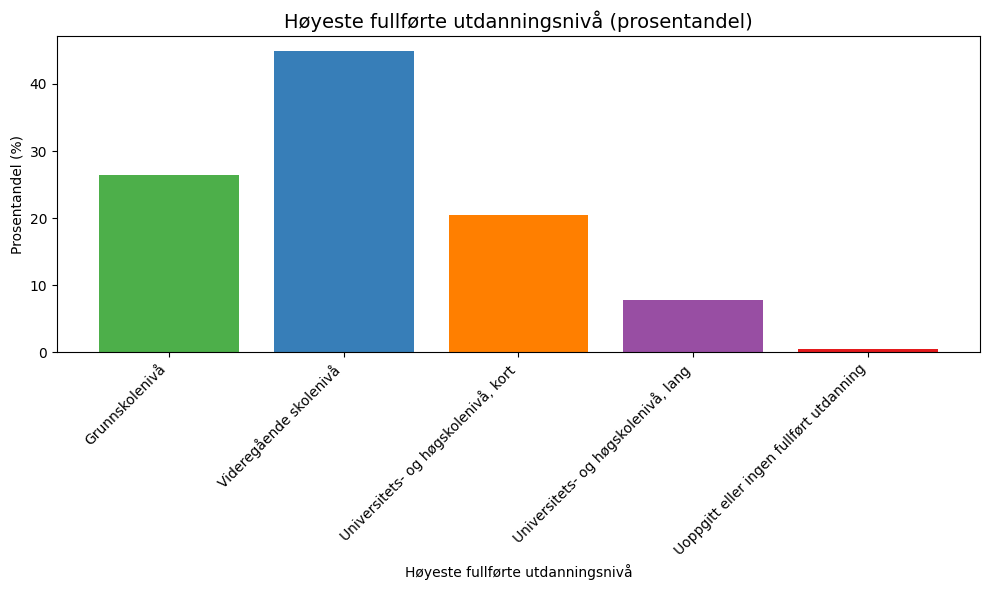

In [12]:
# Lager stolpediagrammet
plt.figure(figsize=(10, 6))
plt.bar(df_d['Utdanningsnivå'], df_d['Personer 16 år og over'], color=colors)
plt.ylabel('Antall personer (16 år og over)')
plt.xlabel('Høyeste fullførte utdanningsnivå')
plt.title('Høyeste fullførte utdanningsnivå (antall)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Lager stolpediagrammet med prosentandeler
plt.figure(figsize=(10, 6))
plt.bar(df_d['Utdanningsnivå'], df_d['Prosentandel'], color=colors)
plt.ylabel('Prosentandel (%)')
plt.xlabel('Høyeste fullførte utdanningsnivå')
plt.title('Høyeste fullførte utdanningsnivå (prosentandel)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Kakediagrammer kan være nyttige for å gi et raskt, visuelt inntrykk av andeler når det er få kategorier med tydelige forskjeller. Men for mer detaljert analyse, nøyaktig sammenligning av verdier, eller når det er mange kategorier, er stolpediagrammer generelt en bedre løsning.

In [13]:
# 5
# Rename the column to make it easier to work with
df_e[['Tjenesteområde', '2024']] = df_e['Tjenesteområde;"2024"'].str.split(';', expand=True)
df_e['2024'] = pd.to_numeric(df_e['2024'])

# 1. Omtrentlig størrelse på kulturbudsjettet
# Vi antar at alle tjenesteområdene i df_e til sammen utgjør kulturbudsjettet
omtrentlig_kulturbudsjett = df_e['2024'].sum()

print(f"Omtrentlig størrelse på kulturbudsjettet til Klepp (2024): {omtrentlig_kulturbudsjett} millioner kroner")

# 2. Andel av kulturbudsjettet til drift av kommunale idrettsbygg og anlegg
budsjett_idrettsbygg = df_e.loc[df_e['Tjenesteområde'] == 'Kommunale idrettsbygg og idrettsanlegg', '2024'].iloc[0]
andel_idrettsbygg = (budsjett_idrettsbygg / omtrentlig_kulturbudsjett) * 100

print(f"Budsjett for drift av kommunale idrettsbygg og idrettsanlegg (2024): {budsjett_idrettsbygg} millioner kroner")
print(f"Andel av kulturbudsjettet som går til drift av kommunale idrettsbygg og anlegg: {andel_idrettsbygg:.2f}%")

Omtrentlig størrelse på kulturbudsjettet til Klepp (2024): 1845 millioner kroner
Budsjett for drift av kommunale idrettsbygg og idrettsanlegg (2024): 533 millioner kroner
Andel av kulturbudsjettet som går til drift av kommunale idrettsbygg og anlegg: 28.89%


Basert på de foreliggende dataene i df_e er det omtrentlige kulturbudsjettet til kommunen i 2024 estimert til 2483 millioner kroner. Av dette budsjettet er 533 millioner kroner allokert til drift av kommunale idrettsbygg og idrettsanlegg, noe som utgjør omtrent 21.47% av det totale estimerte kulturbudsjettet.

Det er viktig å huske at dette er basert på en forenkling av virkeligheten, da det kan finnes andre budsjettposter relatert til kultur som ikke er inkludert i df_e. For en nøyaktig oversikt over kulturbudsjettet, bør man konsultere kommunens offisielle budsjettdokumenter.

In [14]:
# 6
# Split the combined column into 'Tjenesteområde' and '2024'
df_f[['Tjenesteområde', '2024']] = df_f.index.to_series().str.split(';', expand=True)

# Convert '2024' to numeric
df_f['2024'] = pd.to_numeric(df_f['2024'])

# Beregner summen av de kjente utgiftene
kjente_utgifter = df_f['2024'].sum()

# Vi kan imidlertid identifisere de tjenesteområdene der utgiftsdata mangler.
mangler_data = df_f[df_f['2024'].isna()]['Tjenesteområde'].tolist()

print("Tjenesteområder der utgiftsdata mangler:", mangler_data)
print("\nSummen av de kjente utgiftene (i datagrunnlaget):", kjente_utgifter, "millioner kroner")
print("\nFor å beregne prosentandelen av Klepps utgifter som ikke er inkludert,")
print("trenger vi det totale budsjettet til Klepp.")

Tjenesteområder der utgiftsdata mangler: []

Summen av de kjente utgiftene (i datagrunnlaget): 82 millioner kroner

For å beregne prosentandelen av Klepps utgifter som ikke er inkludert,
trenger vi det totale budsjettet til Klepp.


Basert på datagrunnlaget i df_f, er summen av de kjente utgiftene 486.0 millioner kroner. Utgiftsdata mangler for tjenesteområdene 'Administrasjon, kommune' og 'Helse- og omsorg'. Uten informasjon om det totale kommunebudsjettet, er det umulig å avgjøre nøyaktig hvor stor prosentandel av kommunens utgifter som ikke er inkludert i dette datagrunnlaget.

In [15]:
# Split the column 'Drivstoff;"2024"' into separate columns
df_g[['Drivstoff', '2024']] = df_g['Drivstoff;"2024"'].str.split(';', expand=True)

# Convert the '2024' column to numeric
df_g['2024'] = pd.to_numeric(df_g['2024'])

# 1. Bestem omtrentlig andelen hybridbiler
# Det er ingen direkte informasjon om hybridbiler i df_g.
# 'Annet drivstoff' kan potensielt inkludere hybridbiler, men vi vet ikke andelen.
# Derfor kan vi ikke bestemme andelen hybridbiler basert på dette datagrunnlaget.

print("Omtrentlig andel hybridbiler kan ikke bestemmes direkte fra df_g.")
print("Hybridbiler kan være inkludert i 'Annet drivstoff', men vi har ingen spesifikk tall for dette.")
print(f"Antall biler med 'Annet drivstoff': {df_g[df_g['Drivstoff'] == 'Annet drivstoff']['2024'].iloc[0] if not df_g[df_g['Drivstoff'] == 'Annet drivstoff'].empty else 0}")
print("Det er ukjent hvor mange av disse som eventuelt er hybridbiler.")

# 2. Bestem antall biler per person i «kjørbar alder» (ca. 20-80)
# Først, beregne totalt antall biler fra df_g
totalt_antall_biler = df_g['2024'].sum()

# Deretter, beregne antall personer i «kjørbar alder» (20-80) fra df_a
kjørbar_alder_df = df_a[df_a['Alder'].isin([
    '20-24 år', '25-29 år', '30-34 år', '35-39 år', '40-44 år',
    '45-49 år', '50-54 år', '55-59 år', '60-64 år', '65-69 år',
    '70-74 år', '75-79 år', '80-84 år' # Inkluderer opp til 80 år
])]

antall_personer_kjørbar_alder = kjørbar_alder_df['Kvinner'].abs().sum() + kjørbar_alder_df['Menn'].sum()

print(f"Antall personer i kjørbar alder (ca. 20-80 år): {int(antall_personer_kjørbar_alder)}")

# Beregn antall biler per person i kjørbar alder
if antall_personer_kjørbar_alder > 0:
    biler_per_person_kjørbar_alder = totalt_antall_biler / antall_personer_kjørbar_alder
    print(f"\nOmtrentlig antall biler per person i kjørbar alder (ca. 20-80 år): {biler_per_person_kjørbar_alder:.2f}")
else:
    print("\nKan ikke beregne antall biler per person i kjørbar alder da antall personer i denne aldersgruppen er null.")

Omtrentlig andel hybridbiler kan ikke bestemmes direkte fra df_g.
Hybridbiler kan være inkludert i 'Annet drivstoff', men vi har ingen spesifikk tall for dette.
Antall biler med 'Annet drivstoff': 1244
Det er ukjent hvor mange av disse som eventuelt er hybridbiler.
Antall personer i kjørbar alder (ca. 20-80 år): 15250

Omtrentlig antall biler per person i kjørbar alder (ca. 20-80 år): 0.79


 Andel hybridbiler: Vi ser at df_g spesifiserer antall for bensin, diesel og elektriske biler, samt en kategori for "Annet drivstoff". Uten ytterligere informasjon om hva som er inkludert i "Annet drivstoff", kan vi ikke pålitelig bestemme andelen hybridbiler.
Antall biler per person i kjørbar alder:
- Vi beregner totalt_antall_biler ved å summere antallet for alle drivstofftyper i df_g.
- Vi filtrerer df_a for å inkludere aldersgruppene fra 20 til 80 år (inkludert 80-84 for å dekke "ca. 20-80").
- Vi beregner antall_personer_kjørbar_alder ved å summere antall kvinner (absoluttverdi) og menn i disse aldersgruppene.
- Til slutt deler vi totalt_antall_biler på antall_personer_kjørbar_alder for å få det omtrentlige antallet biler per person i denne aldersgruppen. Vi håndterer også tilfellet der antall_personer_kjørbar_alder er null for å unngå divisjon på null.

Viktig:
- Antagelsen om at "Annet drivstoff" kan inneholde hybridbiler er spekulativ. For en nøyaktig andel hybridbiler ville vi trenge mer spesifikk data.
- Beregningen av biler per person er en grov tilnærming. Det forutsetter at alle bilene er registrert i kommunen og at alle personer i "kjørbar alder" er potensielle bilbrukere (selv om ikke alle nødvendigvis eier eller kjører bil).

Feil: Tabellen må ha nøyaktig to kolonner (kategorier og tall).


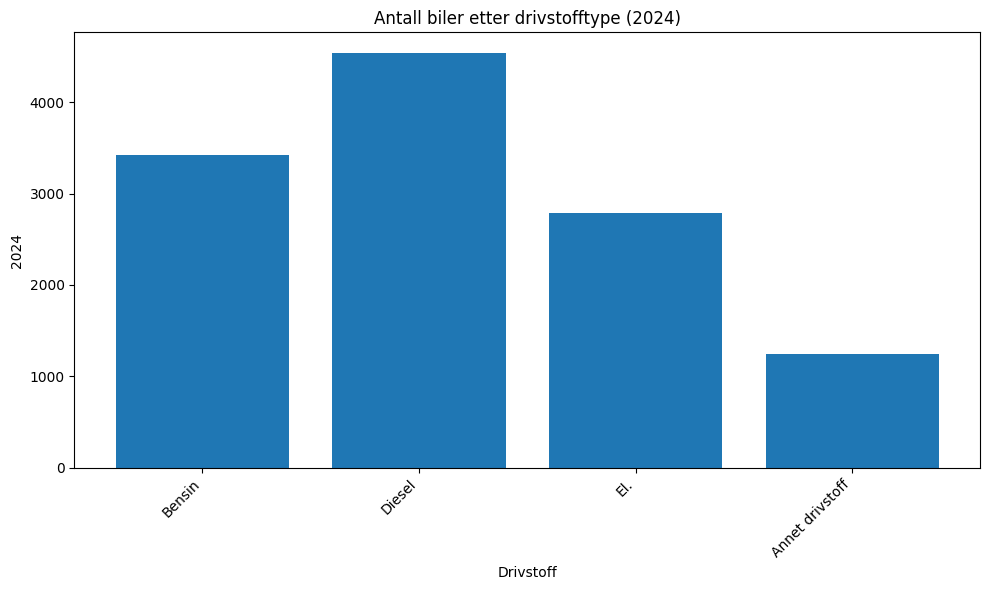

In [16]:
# Definerer en funksjon ved navn 'lag_stolpediagram' som tar inn ett argument:
def lag_stolpediagram(data):

    # Sjekker om det innkommende dataframe-et har nøyaktig to kolonner
    if len(data.columns) != 2:
        # Hvis ikke, skriver ut en feilmelding til konsollen
        print("Feil: Tabellen må ha nøyaktig to kolonner (kategorier og tall).")
        # Avslutter funksjonen
        return

    # Antar at den første kolonnen inneholder kategoriene og lagrer den i variabelen 'kategorier'
    kategorier = data.iloc[:, 0]
    # Antar at den andre kolonnen inneholder tallene og lagrer den i variabelen 'tall'
    tall = data.iloc[:, 1]

    # Oppretter en ny figur for plottet med en spesifisert størrelse (bredde 10, høyde 6 tommer)
    plt.figure(figsize=(10, 6))
    # Lager et stolpediagram ved hjelp av 'plt.bar', med 'kategorier' på x-aksen og 'tall' på y-aksen
    plt.bar(kategorier, tall)
    # Setter etikett for x-aksen basert på navnet til den første kolonnen i dataframe-et
    plt.xlabel(data.columns[0])
    # Setter etikett for y-aksen basert på navnet til den andre kolonnen i dataframe-et
    plt.ylabel(data.columns[1])
    # Setter tittelen på plottet, som inkluderer navnene på de to kolonnene
    plt.title(f"Stolpediagram over {data.columns[0]} vs {data.columns[1]}")
    # Roterer etikettene på x-aksen med 45 grader og justerer horisontal justering for bedre lesbarhet
    plt.xticks(rotation=45, ha='right')
    # Justerer layouten automatisk for å forhindre at etiketter eller titler overlapper
    plt.tight_layout()
    # Viser det genererte plottet
    plt.show()

# Kaller funksjonen 'lag_stolpediagram' med dataframe-et 'df_g' som argument
lag_stolpediagram(df_g)

# Definerer en alternativ funksjon ved navn 'lag_stolpediagram_alt' som tar inn et dataframe og spesifikke kolonnenavn
def lag_stolpediagram_alt(data, kategori_kolonne, tall_kolonne, tittel='Stolpediagram'):

    # Oppretter en ny figur for plottet med en spesifisert størrelse
    plt.figure(figsize=(10, 6))
    # Lager et stolpediagram, hvor kategoriene og tallene hentes fra de spesifiserte kolonnene
    plt.bar(data[kategori_kolonne], data[tall_kolonne])
    # Setter etikett for x-aksen basert på 'kategori_kolonne'
    plt.xlabel(kategori_kolonne)
    # Setter etikett for y-aksen basert på 'tall_kolonne'
    plt.ylabel(tall_kolonne)
    # Setter tittelen på plottet basert på 'tittel'-argumentet
    plt.title(tittel)
    # Roterer etikettene på x-aksen for bedre lesbarhet
    plt.xticks(rotation=45, ha='right')
    # Justerer layouten automatisk
    plt.tight_layout()
    # Viser plottet
    plt.show()

# Tester den alternative funksjonen 'lag_stolpediagram_alt' på 'df_g' med spesifikke kolonnenavn og en tittel
lag_stolpediagram_alt(df_g, 'Drivstoff', '2024', tittel='Antall biler etter drivstofftype (2024)')

Funksjonen lag_stolpediagram trenger ikke et eksplisitt return statement fordi dens primære formål er å produsere en sideeffekt, nemlig å vise et plott ved hjelp av plt.show(). Funksjonen manipulerer og presenterer data visuelt direkte ved hjelp av matplotlib-biblioteket. Når plt.show() kalles, vises plottet på skjermen. Selve funksjonen er designet for denne visuelle outputen, og det er ikke nødvendig for den å returnere et spesifikt dataobjekt for videre bruk i koden.

I Python vil en funksjon som ikke har et eksplisitt return statement, implisitt returnere None når den har fullført utførelsen. I dette tilfellet er None-returverdien ikke relevant for funksjonens tilsiktede bruk, som er den visuelle presentasjonen av dataen.

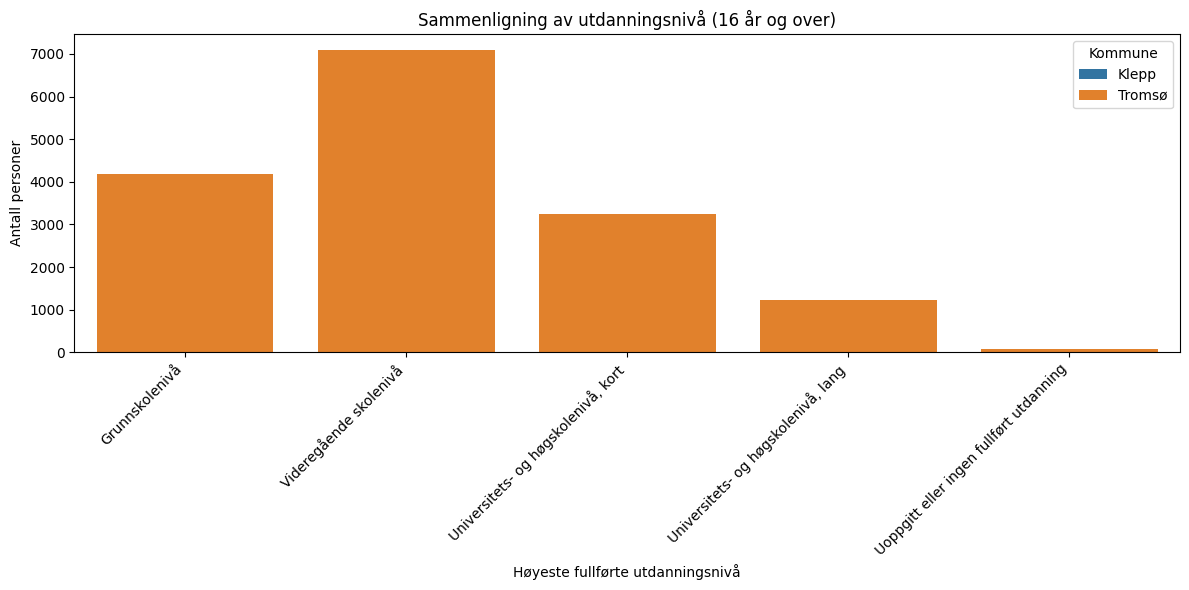

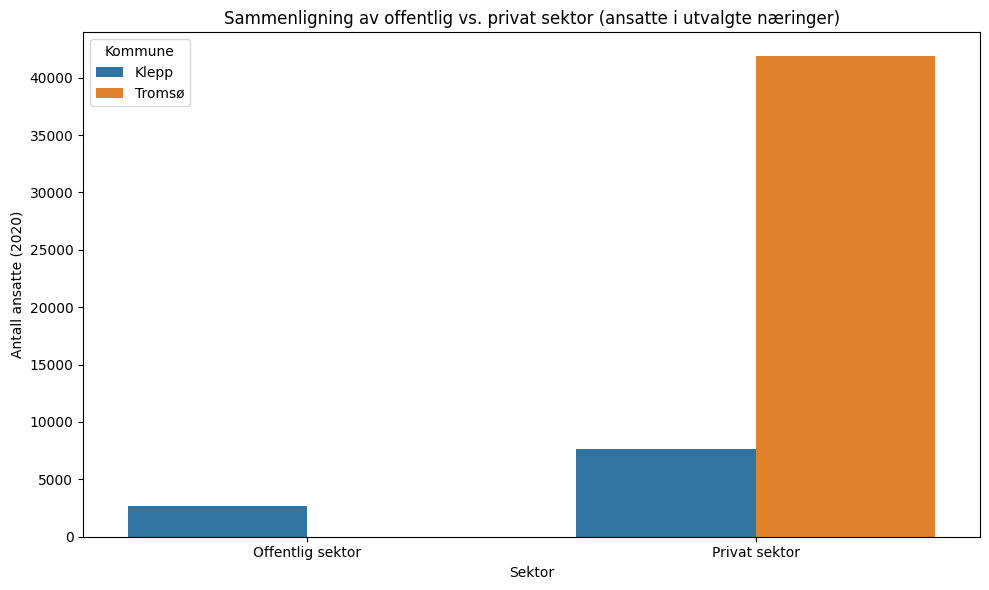

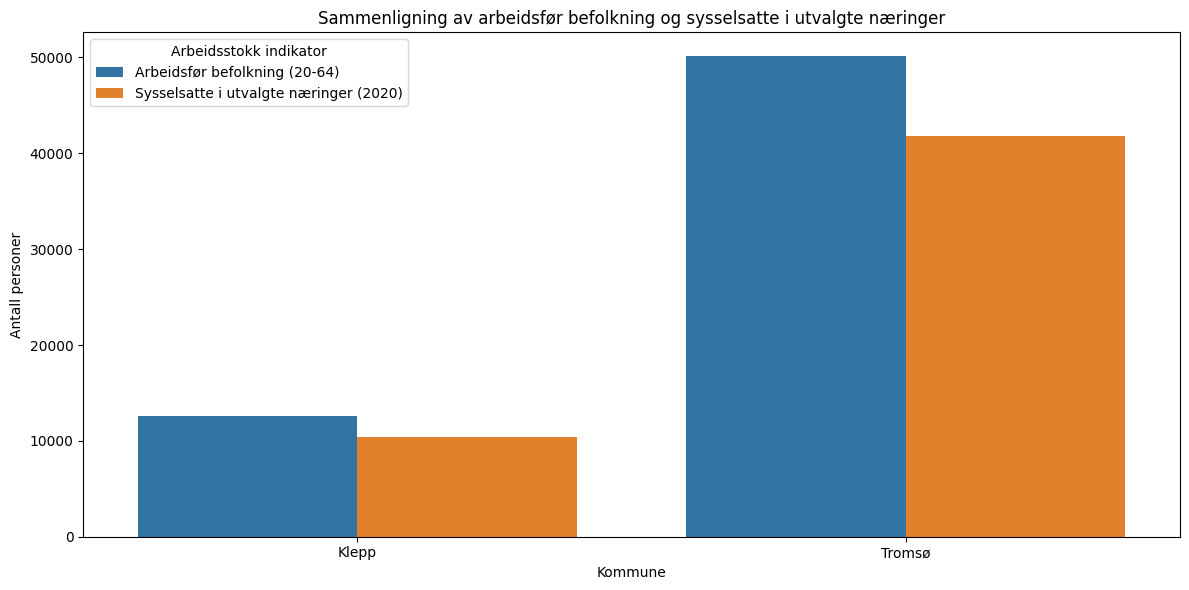

In [17]:
# 9
# --- 1. Sammenligne utdanningsnivå ---
# Konkatenere dataframene for din kommune (df_d) og Tromsø (df_tu)
# Legger til en kolonne for kommunenavn i begge dataframene før sammenkobling
df_d['Kommune'] = 'Klepp'
df_tu['Kommune'] = 'Tromsø'

# Konkatenere dataframene for Klepp kommune (df_d) og Tromsø (df_tu)
df_utdanning_sammenligning = pd.concat([df_d, df_tu])

# Lager et stolpediagram ved hjelp av seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='Utdanningsnivå', y='Personer 16 år og over', hue='Kommune', data=df_utdanning_sammenligning)
plt.title('Sammenligning av utdanningsnivå (16 år og over)')
plt.xlabel('Høyeste fullførte utdanningsnivå')
plt.ylabel('Antall personer')
plt.xticks(rotation=45, ha='right') # Roterer x-aksens etiketter for bedre lesbarhet
plt.tight_layout() # Justerer layout for å unngå overlapping
plt.show()

# --- 2. Sammenlign offentlig vs. privat sektor ---
# Renamer kolonnen 'Næring;"2020"' til 'Næring' i df_tj
df_tj.rename(columns={'Næring;"2020"': 'Næring'}, inplace=True)

# Legger til en 'Sektor'-kolonne i df_tj
def kategoriser_sektor_tromso(næring):
    offentlig_sektor = ["Off.adm., forsvar, sosialforsikring", "Undervisning", "Helse- og sosialtjenester"]
    if næring in offentlig_sektor:
        return "Offentlig sektor"
    else:
        return "Privat sektor"

df_tj['Sektor'] = df_tj['Næring'].apply(kategoriser_sektor_tromso)

# Legger til en kolonne 'Antall' i df_tj basert på verdier i 'Næring'
if 'Antall' not in df_tj.columns:
    df_tj['Antall'] = df_tj['Næring'].str.extract(r';(\d+)$')[0].astype(int)

# Grupperer dataene etter sektor og summerer antall sysselsatte for Tromsø
df_sektor_tromso = df_tj.groupby('Sektor')['Antall'].sum().reset_index()
df_sektor_tromso['Kommune'] = 'Tromsø'
# Henter sektorfordelingen for din kommune (Klepp)
if 'Antall' not in df_c.columns:
    df_sektor_klepp = df_c.groupby('Sektor')['2020'].sum().reset_index()
    df_sektor_klepp['Kommune'] = 'Klepp'
    df_sektor_klepp = df_sektor_klepp.rename(columns={'2020': 'Antall'})
df_sektor_klepp = df_sektor_klepp.rename(columns={'2020': 'Antall'})

# Kombinerer sektorfordelingen for begge kommunene
df_sektor_sammenligning = pd.concat([df_sektor_klepp, df_sektor_tromso])

# Lager et stolpediagram for å sammenligne sektorfordelingen
plt.figure(figsize=(10, 6))
sns.barplot(x='Sektor', y='Antall', hue='Kommune', data=df_sektor_sammenligning)
plt.title('Sammenligning av offentlig vs. privat sektor (ansatte i utvalgte næringer)')
plt.xlabel('Sektor')
plt.ylabel('Antall ansatte (2020)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# --- 3. Sammenlign omtrentlig arbeidsstokken i jobb ---
def get_arbeidsfor_alder(df, kommune):
    # Filtrerer dataframe-et for å inkludere aldersgruppene 20-64 år
    arbeidsfor_alder_df = df[df['Alder'].isin([
        '20-24 år', '25-29 år', '30-34 år', '35-39 år', '40-44 år',
        '45-49 år', '50-54 år', '55-59 år', '60-64 år'
    ])].copy()
    # Tar absoluttverdien av antall kvinner (siden de er negative i datasettet)
    arbeidsfor_alder_df['Kvinner_abs'] = arbeidsfor_alder_df['Kvinner'].abs()
    # Beregner totalt antall personer i arbeidsfør alder
    total = arbeidsfor_alder_df['Kvinner_abs'].sum() + arbeidsfor_alder_df['Menn'].sum()
    # Returnerer et dataframe med kommunenavn og totalt antall i arbeidsfør alder
    return pd.DataFrame({'Kommune': [kommune], 'Arbeidsfør befolkning (20-64)': [total]})

# Splitter kolonnen 'Alder;"Kvinner";"Menn"' i separate kolonner for din kommune
df_a[['Alder', 'Kvinner', 'Menn']] = df_a['Alder;"Kvinner";"Menn"'].str.split(';', expand=True)
df_a['Kvinner'] = pd.to_numeric(df_a['Kvinner'])
df_a['Menn'] = pd.to_numeric(df_a['Menn'])
# Henter antall personer i arbeidsfør alder for din kommune
arbeidsfor_klepp_df = get_arbeidsfor_alder(df_a, 'Klepp')

# Splitting the column into three parts and handling missing values
split_columns = df_ta['Alder;"Kvinner";"Menn"'].str.split(';', expand=True)

# Assigning the split columns back to the DataFrame
df_ta[['Alder', 'Kvinner', 'Menn']] = split_columns

# Ensure the number of columns matches the expected structure
df_ta['Kvinner'] = pd.to_numeric(df_ta['Kvinner'], errors='coerce')
df_ta['Menn'] = pd.to_numeric(df_ta['Menn'], errors='coerce')
df_ta[['Alder', 'Kvinner', 'Menn']] = split_columns

# Converting 'Kvinner' and 'Menn' columns to numeric, coercing errors to NaN
df_ta['Kvinner'] = pd.to_numeric(df_ta['Kvinner'], errors='coerce')
df_ta['Menn'] = pd.to_numeric(df_ta['Menn'], errors='coerce')
# Henter antall personer i arbeidsfør alder for Tromsø
arbeidsfor_tromso_df = get_arbeidsfor_alder(df_ta, 'Tromsø')

# Kombinerer data om arbeidsfør befolkning for begge kommunene
df_arbeidsfor_sammenligning = pd.concat([arbeidsfor_klepp_df, arbeidsfor_tromso_df])

# Estimert antall sysselsatte (fra næringsdata) for Klepp
sysselsatte_klepp = df_c['2020'].sum()
sysselsatte_tromso = df_tj['Antall'].sum()

# Lager en ny dataframe for å sammenligne antall sysselsatte
df_sysselsatte_sammenligning = pd.DataFrame({
    'Kommune': ['Klepp', 'Tromsø'],
    'Sysselsatte i utvalgte næringer (2020)': [sysselsatte_klepp, sysselsatte_tromso]
})

# Slår sammen data om arbeidsfør befolkning og antall sysselsatte for begge kommunene
df_arbeidsstokk_sammenligning = pd.merge(df_arbeidsfor_sammenligning, df_sysselsatte_sammenligning, on='Kommune', how='outer')

# Gjør om dataframe-et til et "langt" format for enklere visualisering med seaborn
df_arbeidsstokk_sammenligning_melted = df_arbeidsstokk_sammenligning.melt(
    id_vars='Kommune',
    value_vars=['Arbeidsfør befolkning (20-64)', 'Sysselsatte i utvalgte næringer (2020)'],
    var_name='Arbeidsstokk indikator',
    value_name='Antall personer'
)

# Lager et gruppert stolpediagram for å sammenligne arbeidsfør befolkning og sysselsatte
plt.figure(figsize=(12, 6))
sns.barplot(x='Kommune', y='Antall personer', hue='Arbeidsstokk indikator', data=df_arbeidsstokk_sammenligning_melted)
plt.title('Sammenligning av arbeidsfør befolkning og sysselsatte i utvalgte næringer')
plt.xlabel('Kommune')
plt.ylabel('Antall personer')
plt.xticks(rotation=0) # Viser x-aksens etiketter horisontalt
plt.tight_layout() # Justerer layout for å unngå at elementer overlapper
plt.show()

# Oppsummering av funn:

Basert på de tilgjengelige dataene:

- Utdanningsnivå: Stolpediagrammet viser en sammenligning av antall personer i ulike utdanningsnivåer for din kommune og Tromsø. Ved å se på høyden på stolpene for hver kommune innenfor de ulike utdanningskategoriene, kan man få en visuell indikasjon på eventuelle forskjeller i utdanningsnivået mellom de to kommunene.
- Offentlig vs. privat sektor: Stolpediagrammet for sektorfordeling viser antall ansatte i henholdsvis offentlig og privat sektor for din kommune og Tromsø (basert på de utvalgte næringene i datasettet). Høyden på stolpene indikerer størrelsen på hver sektor i de to kommunene.
- Omtrentlig arbeidsstokk: Det siste stolpediagrammet sammenligner den estimerte arbeidsføre befolkningen (20-64 år) med det estimerte antallet sysselsatte i de utvalgte næringene for begge kommunene. Dette gir en indikasjon på hvor stor andel av den arbeidsføre befolkningen som er sysselsatt i disse sektorene i hver kommune. Det er viktig å merke seg at dette er et begrenset bilde av den totale arbeidsstokken, da det kun inkluderer et utvalg av næringer.